# Notes for DIGITAL IMAGE PROCESSING
By 徐润奇 Xu Runqi \
2220009454@student.must.edu.mo\
M.U.S.T. 2023

## 1. Read image and basic color handling

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


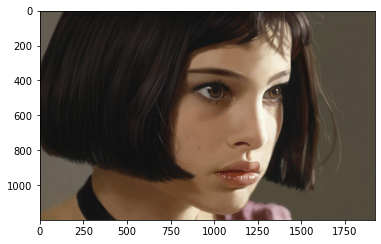

In [2]:
# Load the image
img = plt.imread('a.jpg')
plt.imshow(img)

**NOTICE**: We have different ways to load pictures in python, and their contruction are *different*! For example,plt.imread and PIL,Image.open read image data in the order of RGB，but cv2.imread read it in BGR!

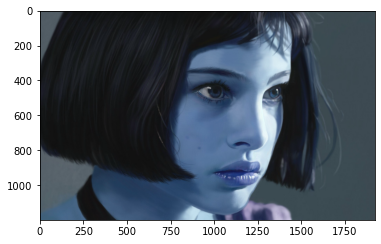

In [5]:
# Load the image
img1 = cv2.imread('a.jpg')
plt.imshow(img1)

We can find above figure has been changed into a 'strange' color! How to solve it?

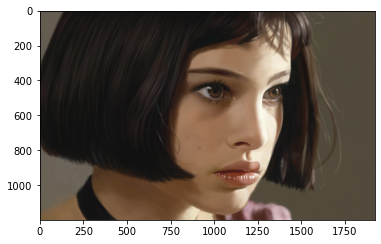

In [6]:
# Convert the color channels from BGR to RGB
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(img1)
plt.show()

Now we can see it turns into normal color! So do remember to check the format of RGB or GBR in the future work to avoid the mistake!

### 1.1 Picture binarization by PILLOW

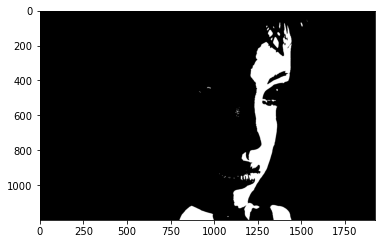

In [7]:
# Change figure into black and white by pakage 'PLIIOW'
from PIL import Image
# Model 'L'is gray image，each pixel represented by 8 bits，0-black，255-white，number represents gray-scale.
img_PIL = Image.open('a.jpg')
Img = img_PIL.convert('L')

# Costumize the threshold of gray_scale，pixels larger than treshold change into black，conversely white.
threshold = 150

table = []
for i in range(256):
    if i < threshold:
        table.append(0)
    else:
        table.append(1)

# Show the Binary image
bw_img = Img.point(table, '1')
plt.imshow(bw_img)

# HANDBOOK of PIL is https://pillow.readthedocs.io/en/latest/handbook/index.html

### 1.2 Transfer picture into Grayscale and Bluescale

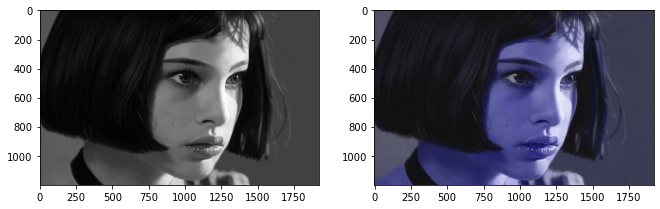

In [4]:
# Change it into gray figure   ** See the NOTE!!
gray_mat = [0.299,0.857,0.114]
gray_img = np.dot(img,gray_mat)
fig = plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.imshow(gray_img, cmap='gray')


# Change image color to Blue-style
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) # Transfer RGB image into HSV figure
blue_tint = np.zeros_like(hsv_img)
# Set the hue channel of the numpy array to a value that corresponds to blue. The hue channel in the HSV color space ranges from 0 to 179,
# with blue corresponding to a hue value of around 120:
blue_tint[:, :, 0] = 120
# Set the saturation and value channels of the numpy array to the corresponding channels of the HSV image:
blue_tint[:, :, 1] = hsv_img[:, :, 1]
blue_tint[:, :, 2] = hsv_img[:, :, 2]
# Transform it back to RGB image
blue_img = cv2.cvtColor(blue_tint, cv2.COLOR_HSV2RGB) 
plt.subplot(1,2,2)
plt.imshow(blue_img)


**Note**: The formula of Gray-dgree processing：$Gray=R*0.299+G*0.587+B*0.114$ \
Or we can directly use package: *gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY), directly reach the goal*

# 2. Gray-Level Histogram 

## 2.1 Show the Gray-Level Histogram of a picture

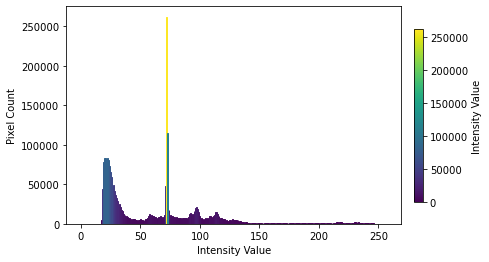

In [5]:
from matplotlib import cm
from matplotlib.collections import LineCollection

# Load the image again by cv2
img = cv2.imread('a.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Calculate the grayscale histogram
hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
x = np.linspace(1,len(hist),len(hist))
y = np.transpose(hist)[0]

# Plot the grayscale histogram
fig, ax = plt.subplots()
ax.set_xlabel('Intensity Value')
ax.set_ylabel('Pixel Count')
bars = ax.bar(x,y)

# Add a grayscale bar below the histogram
norm = plt.Normalize(y.min(), y.max())
norm_y = norm(y)
map_vir = cm.get_cmap(name='viridis')
color = map_vir(norm_y)

# Set the color of the bars
for i, bar in enumerate(bars):
    bar.set_color(color[i])

# Create the colorbar
cax = fig.add_axes([0.93, 0.2, 0.02, 0.6]) # [left, bottom, width, height]
cb = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=map_vir), cax=cax)
cb.set_label('Intensity Value')
plt.show()


From the figure we can know the 'Dark-Gray' part in the middle left take the largest part. And visually it is.



### 2.2 Equalization by Histogram method

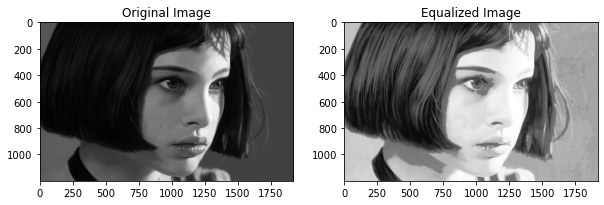

In [6]:
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('a.jpg')

# Convert the image to grayscale
gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

# Perform histogram equalization
hist, bins = np.histogram(gray_img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
equalized_img = np.interp(gray_img.flatten(), bins[:-1], cdf_normalized).reshape(gray_img.shape)

# Display the original and equalized images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(equalized_img, cmap='gray')
ax[1].set_title('Equalized Image')
plt.show()
 

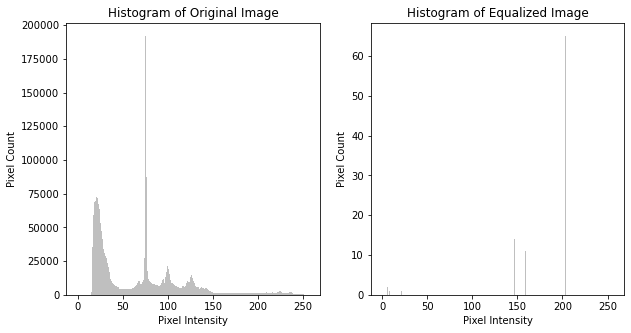

In [7]:
# Plot the histograms of the original and equalized images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(gray_img.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.5)
ax[0].set_title('Histogram of Original Image')
ax[0].set_xlabel('Pixel Intensity')
ax[0].set_ylabel('Pixel Count')
ax[1].hist(equalized_img.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.5)
ax[1].set_title('Histogram of Equalized Image')
ax[1].set_xlabel('Pixel Intensity')
ax[1].set_ylabel('Pixel Count')
plt.show()


### 2.3  Text Extraction by Boundary Threshold Selection
Suppose we now have a figure with letters and background: 
<div align="left">
<img src=word.jpg width=30%>
</div>
We want to tick out the colorful background and remain the words.

In [8]:
# Load the image
img = cv2.imread('word.jpg')
img= img[:,:,::-1] # Tansfer BGR read by cv2 to RGB


# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding to obtain a binary image
thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Find the contours of the binary image
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask from the contours
mask = np.zeros(img.shape[:2], np.uint8)
for cnt in contours:
    cv2.drawContours(mask, [cnt], 0, 255, -1)

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=mask)

# Invert the result image
result = cv2.subtract(np.full(img.shape, 255, dtype=np.uint8), result)

# Fill in the contours to obtain solid black text
for cnt in contours:
    cv2.drawContours(result, [cnt], 0, 0, -1)


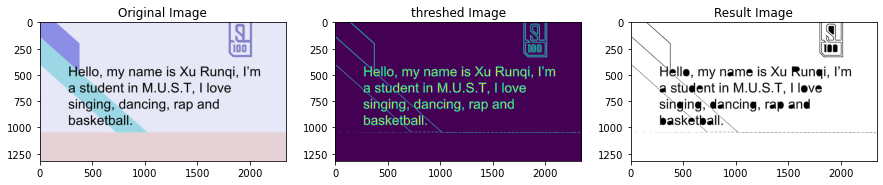

In [9]:
# Show the results and processing procedure
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(img)
ax[0].set_title('Original Image')

ax[1].imshow(thresh)
ax[1].set_title('threshed Image')

ax[2].imshow(result)
ax[2].set_title('Result Image')

plt.show()

### 2.4 Text recognition 

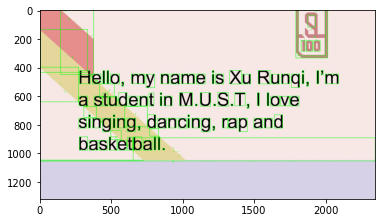

In [10]:
# Load the image
img = cv2.imread('word.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding using BTS
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Find contours
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original image for drawing bounding boxes
result = img.copy()

# Loop over contours and draw bounding boxes
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the result
plt.imshow(result)



In [11]:
import cv2
import pytesseract

# Load the image
img = cv2.imread('word.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 0)

# Perform adaptive thresholding using BTS
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Perform OCR using Tesseract
config = ('-l eng --oem 1 --psm 3')
words = pytesseract.image_to_string(threshold, config=config)

# Print the recognized words
print("The result words recognized is:")
print(words)


The result words recognized is:
\ q
IN 100 |
\ Aelo, my name is Xu Rundi, I’m

‘Na student in M.U.S.T, | love
singing, dancing, rap and

basketball.




We can see the above result, though have some mistakes, we can almost get the content in the picture. Of cause there are many furhter operation we need to apply, but here we won't keep researching on it since it's another deep field in Text Recogonition.

## Linear Point Operations

Text(0.5, 1.0, 'Modified image k=0.5, b=-20')

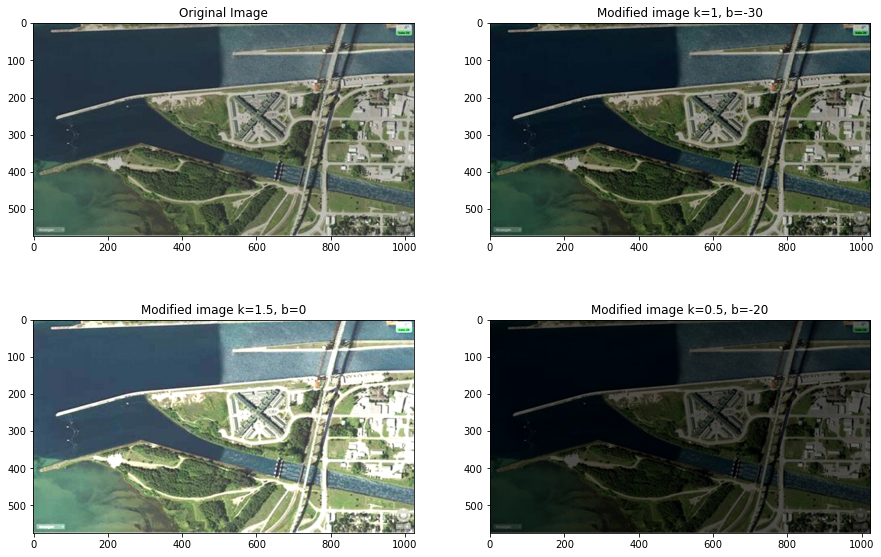

In [12]:
from PIL import Image

# Open the image file
image = Image.open("map.jfif")

# Define the point operation function
def point_operation(pixel,k,m):
    # Extract the red, green, and blue values of the pixel
    r, g, b = pixel

    # Modify the pixel values using the point operation
    r_new = int(r*k+m)
    g_new = int(g*k+m)
    b_new = int(b*k+m)

    # Return the modified pixel values as a tuple
    return (r_new, g_new, b_new)

# Apply the point operation to each pixel in the image and we set k=1,b=-30
new_data_1 = [point_operation(pixel,1,-30) for pixel in image.getdata()]

# Create a new image with the modified pixel data
new_image_1 = Image.new(image.mode, image.size)
new_image_1.putdata(new_data_1)


# Apply the point operation to each pixel in the image and we set k=1.5,b=0
new_data_2 = [point_operation(pixel,1.5,0) for pixel in image.getdata()]
new_image_2 = Image.new(image.mode, image.size)
new_image_2.putdata(new_data_2)

# Apply the point operation to each pixel in the image and we set k=1,b=-50
new_data_3 = [point_operation(pixel,0.5,-20) for pixel in image.getdata()]
new_image_3 = Image.new(image.mode, image.size)
new_image_3.putdata(new_data_3)


# Save the modified image
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0][0].imshow(image)
ax[0][0].set_title('Original Image')
ax[0][1].imshow(new_image_1)
ax[0][1].set_title('Modified image k=1, b=-30')
ax[1][0].imshow(new_image_2)
ax[1][0].set_title('Modified image k=1.5, b=0')
ax[1][1].imshow(new_image_3)
ax[1][1].set_title('Modified image k=0.5, b=-20')


We can see by our operation for $y = k*x+b$: \
By setting $b = -30$, the map get darker and we can see the buliding clearer. \
By setting $k = 1.5$, we can see the contrast of map is larger. \
By setting $k = 0$ and $b = -20$, we can see the map get darker and contrast is smaller.

## Nonlinear Monotonic Point Operations

### Sigmoid Transformation:


Sigmoid transformation is another nonlinear monotonic point operation that maps the input pixel values to output values using a sigmoid function. This operation increases the contrast in a specific range of pixel values.


Text(0.5, 1.0, 'Sigmoid transformation')

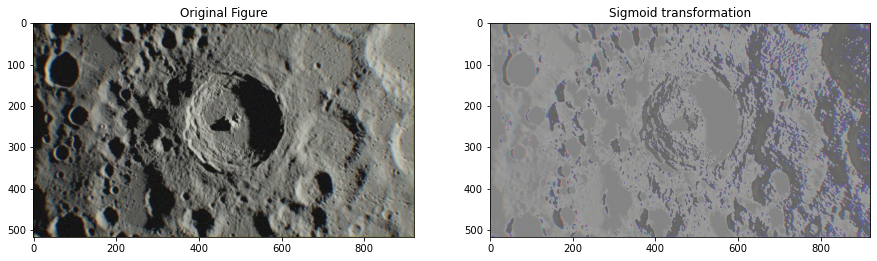

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Load input image
img = plt.imread('moon.jpeg')

# Sigmoid transformation with alpha=1 and beta=0.5
alpha = 1
beta = 0.5
img_out = 1 / (1 + np.exp(-alpha * (img - 128) / 255.0 + beta))

# Clip pixel values to [0, 1]
img_out = np.clip(img_out, 0, 1)

# Display the output image
fig,ax = plt.subplots(1,2,figsize=(15, 10))
ax[0].imshow(img)
ax[0].set_title('Original Figure')
ax[1].imshow(img_out)
ax[1].set_title('Sigmoid transformation')


### Exponential Transformation

Exponential transformation is another nonlinear monotonic point operation that maps the input pixel values to output values using an exponential function. This operation increases the contrast of bright pixels while compressing the dark areas.

Text(0.5, 1.0, 'Sigmoid transformation')

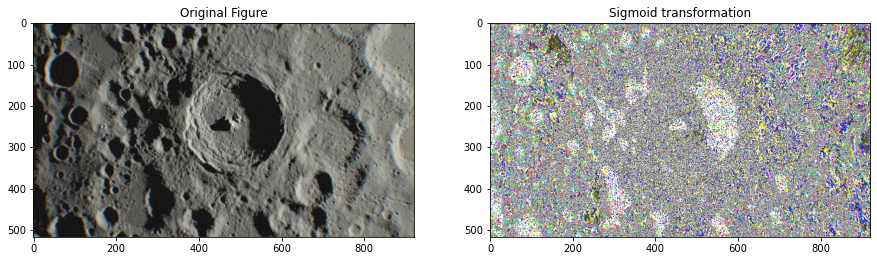

In [14]:
# Exponential transformation with c=10
c = 10
img_out = np.exp(c * img / 255.0) - 1

# Clip pixel values to [0, 1]
img_out_1 = np.clip(img_out, 0, 1)

# Display the output image
fig,ax = plt.subplots(1,2,figsize=(15, 10))
ax[0].imshow(img) 
ax[0].set_title('Original Figure')
ax[1].imshow(img_out_1)
ax[1].set_title('Sigmoid transformation')

### Histogram Equalization

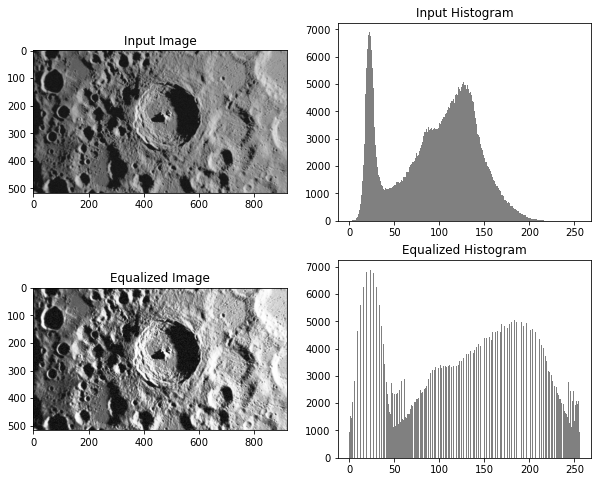

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load input image
img = cv2.imread('moon.jpeg', 0)

# Calculate histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Calculate cumulative distribution function
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# Perform histogram equalization
img_equalized = cv2.equalizeHist(img)

# Display input, output and their histograms
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1), plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.subplot(2,2,2), plt.hist(img.flatten(), 256, [0, 256],color = 'gray')
plt.title('Input Histogram')
plt.subplot(2,2,3), plt.imshow(img_equalized, cmap='gray')
plt.title('Equalized Image')
plt.subplot(2,2,4), plt.hist(img_equalized.flatten(), 256, [0, 256], color = 'gray')
plt.title('Equalized Histogram')
plt.show()


### Histogram Matching 

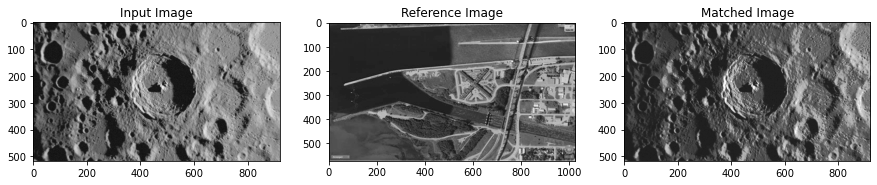

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
 
# Load input and reference images
img = cv2.imread('moon.jpeg', cv2.IMREAD_GRAYSCALE)
ref = cv2.imread('map.jfif', cv2.IMREAD_GRAYSCALE)

# Calculate histogram of input and reference images
hist_input, bins_input = np.histogram(img.flatten(), 256, [0, 256])
hist_ref, bins_ref = np.histogram(ref.flatten(), 256, [0, 256])

# Calculate cumulative distribution function of input and reference histograms
cdf_input = hist_input.cumsum()
cdf_ref = hist_ref.cumsum()

# Normalize cumulative distribution functions to the range [0, 255]
cdf_input_normalized = cdf_input * 255 / cdf_input[-1]
cdf_ref_normalized = cdf_ref * 255 / cdf_ref[-1]

# Perform histogram matching
img_matched = np.interp(img.flatten(), bins_input[:-1], cdf_input_normalized)
img_matched = np.interp(img_matched, cdf_ref_normalized, bins_ref[:-1])
img_matched = img_matched.reshape(img.shape)

# Display input, reference and matched images
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.subplot(1,3,2), plt.imshow(ref, cmap='gray')
plt.title('Reference Image')
plt.subplot(1,3,3), plt.imshow(img_matched, cmap='gray')
plt.title('Matched Image')
plt.show()


### Retrieval from image database by Histogram Matching 

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, io

# Load the query image
query_image = io.imread("query_image.jpg")

# Load the image database
database = [
    io.imread("image1.jpg"),
    io.imread("image2.jpg"),
    io.imread("image3.jpg"),
    io.imread("image4.jpg")
]

# Initialize an empty list to store the similarity scores
scores = []

# Convert the query image to grayscale
query_image_gray = np.dot(query_image[...,:3], [0.299, 0.587, 0.114])

# Calculate the histogram of the query image
query_hist, bins = np.histogram(query_image_gray.ravel(), bins=256, range=[0,256])

# Normalize the histogram
query_hist = query_hist / np.sum(query_hist)

# Loop through the database images
for image in database:
    # Convert the database image to grayscale
    image_gray = np.dot(image[...,:3], [0.299, 0.587, 0.114])
    
    # Calculate the histogram of the database image
    image_hist, bins = np.histogram(image_gray.ravel(), bins=256, range=[0,256])
    
    # Normalize the histogram
    image_hist = image_hist / np.sum(image_hist)
    
    # Calculate the histogram matching score using the correlation method
    score = np.corrcoef(query_hist, image_hist)[0,1]
    
    # Add the score to the list of scores
    scores.append(score)

Text(0.5, 1.0, 'Query image')

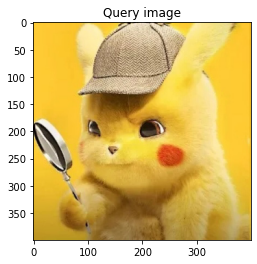

In [18]:
# Plot the query image 
plt.imshow(query_image)
plt.title('Query image')

Text(0.5, 1.0, 'Comparison Image4')

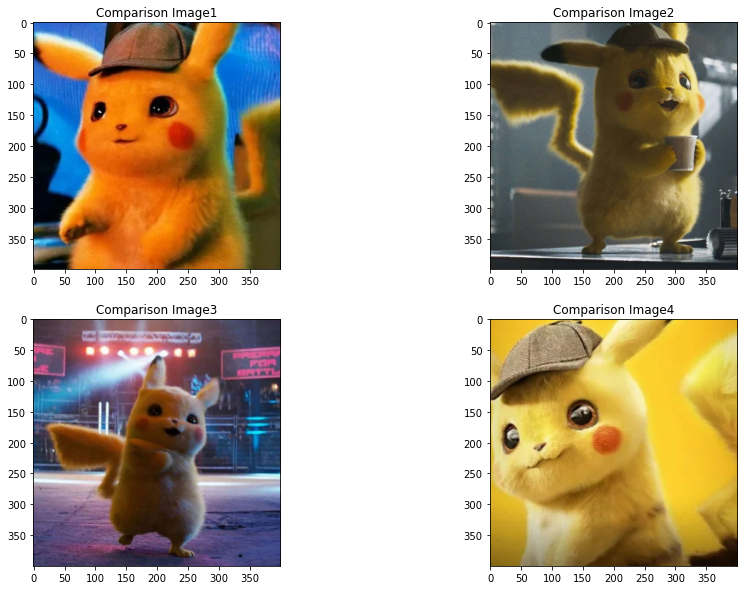

In [19]:
# Plot the comparason image
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax[0][0].imshow(database[0])
ax[0][0].set_title('Comparison Image1')
ax[0][1].imshow(database[1])
ax[0][1].set_title('Comparison Image2')
ax[1][0].imshow(database[2])
ax[1][0].set_title('Comparison Image3')
ax[1][1].imshow(database[3])
ax[1][1].set_title('Comparison Image4')

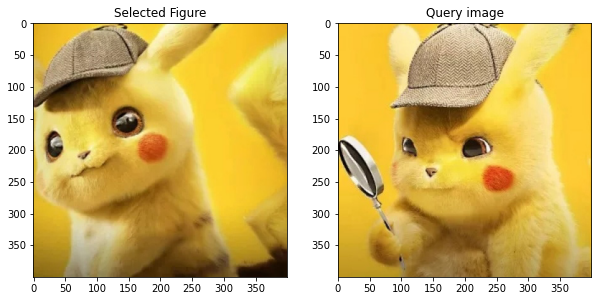

In [20]:
# Find the index of the most similar image
index = np.argmax(scores)

# Load and display the most similar image
most_similar_image = io.imread(f"image{index+1}.jpg")

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(most_similar_image)
ax[0].set_title('Selected Figure')
ax[1].imshow(query_image)
ax[1].set_title('Query image')
plt.show()

Now we can see we select the most similar Pikachu!!

### Image Enhancement by point operation

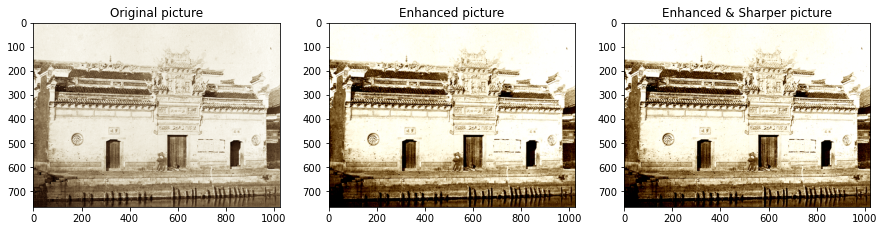

In [21]:
from PIL import Image, ImageEnhance

# Load the image
img = Image.open('jiangnan.png')

# Enhance the contrast
contrast_enhancer = ImageEnhance.Contrast(img)
enhanced_img = contrast_enhancer.enhance(1.5)

# Increase the sharpness
sharpness_enhancer = ImageEnhance.Sharpness(enhanced_img)
final_img = sharpness_enhancer.enhance(2.0)

# Display the original and enhanced images
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1), plt.imshow(img)
plt.title('Original picture')
plt.subplot(1,3,2), plt.imshow(enhanced_img)
plt.title('Enhanced picture')
plt.subplot(1,3,3), plt.imshow(final_img)
plt.title('Enhanced & Sharper picture')
plt.show()

Now we can see our old picture become clearer and 'newer'!!!

## Algebraic Operations 

### Denoise the Guassian noise by Averaging

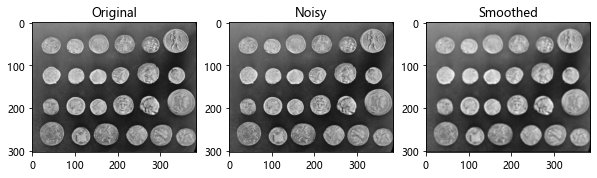

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import random_noise

# Load the image
img = data.coins()

# Add Gaussian noise
mean = 0
variance = 0.01
gaussian = np.random.normal(mean, variance ** 0.5, img.shape)
noisy_img = img + gaussian

# Define the filter size
filter_size = 3

# Create the filter kernel
kernel = np.ones((filter_size, filter_size), np.float32) / (filter_size ** 2)

# Apply the filter
rows, cols = noisy_img.shape
smoothed_img = np.zeros_like(noisy_img)
for i in range(filter_size//2, rows-filter_size//2):
    for j in range(filter_size//2, cols-filter_size//2):
        smoothed_img[i,j] = np.sum(kernel * noisy_img[i-filter_size//2:i+filter_size//2+1,j-filter_size//2:j+filter_size//2+1])

# Display the original and filtered images
fig, axs = plt.subplots(1, 3, figsize=(10,5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Noisy')
axs[2].imshow(smoothed_img, cmap='gray')
axs[2].set_title('Smoothed')
plt.show()


### Additive Watermark

In [77]:
from PIL import Image

def add_watermark(original_image_path, watermark_image_path, watermarked_image_path):
    """Adds a watermark to an image using the LSB technique."""
    # Open the original image and convert to RGBA
    original_image = Image.open(original_image_path).convert('RGBA')

    # Open the watermark image and convert to RGBA
    watermark_image = Image.open(watermark_image_path).convert('RGBA')

    # Resize the watermark to fit the original image
    watermark_image = watermark_image.resize(original_image.size)

    # Create a new image with the same size as the original image
    watermarked_image = Image.new('RGBA', original_image.size, (0,0,0,0))

    # Get the pixel data for the original and watermark images
    original_pixels = original_image.load()
    watermark_pixels = watermark_image.load()
    watermarked_pixels = watermarked_image.load()

    # Iterate over each pixel in the original image
    for x in range(original_image.width):
        for y in range(original_image.height):
            # Get the original and watermark pixel values
            original_pixel = original_pixels[x, y]
            watermark_pixel = watermark_pixels[x, y]

            # Convert the original and watermark pixel values to binary strings
            original_r, original_g, original_b, original_a = original_pixel
            original_r_bin = format(original_r, '08b')
            original_g_bin = format(original_g, '08b')
            original_b_bin = format(original_b, '08b')
            watermark_r, watermark_g, watermark_b, watermark_a = watermark_pixel
            watermark_r_bin = format(watermark_r, '08b')
            watermark_g_bin = format(watermark_g, '08b')
            watermark_b_bin = format(watermark_b, '08b')

            # Modify the least significant bit of each color channel in the original image with the corresponding bit of the watermark image
            watermarked_r_bin = original_r_bin[:-1] + watermark_r_bin[-1]
            watermarked_g_bin = original_g_bin[:-1] + watermark_g_bin[-1]
            watermarked_b_bin = original_b_bin[:-1] + watermark_b_bin[-1]

            # Convert the modified binary strings back to integer pixel values
            watermarked_r = int(watermarked_r_bin, 2)
            watermarked_g = int(watermarked_g_bin, 2)
            watermarked_b = int(watermarked_b_bin, 2)

            # Set the new pixel color in the watermarked image
            watermarked_pixels[x, y] = (watermarked_r, watermarked_g, watermarked_b, original_a)

    # Save the watermarked image
    watermarked_image.save(watermarked_image_path)

# Example usage
add_watermark('image1.jpg', 'wm.png', 'watermarked_image.png')


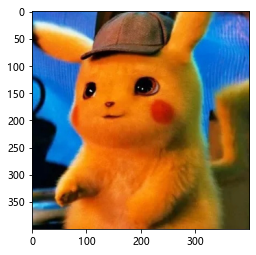

In [87]:
wm = Image.open('watermarked_image.png')
plt.imshow(wm)

From our eye we cannot find it has the watermark, but in fact it is